The goal of this pre-processing file is to determine what filter and parameters are most likely to make it easier to segment the dataset

In [1]:
import numpy as np
import skimage as sk
import matplotlib.pyplot as plt
import os

# mount drive- following tutorial at https://medium.com/ml-book/simplest-way-to-open-files-from-google-drive-in-google-colab-fae14810674
from google.colab import drive
drive.mount('/content/drive')
 


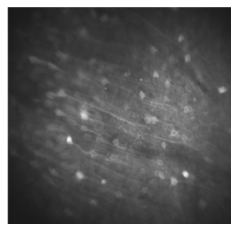

In [45]:
# import image

im_dir='drive/My Drive/CHEME 599/Project/images'; # image path to open

images = []
i=0;
for fname in os.listdir(im_dir):
  im=plt.imread(os.path.join(im_dir, fname)); # read image 
  images=([images, im]) # still not working 
  


fig, ax=plt.subplots(figsize=(4,4)) # prepare plot of image
ax.imshow(im.astype('uint8'))  # plot the image
ax.axis('off'); # remove axis labels, semicolon suppresses text output 

In [47]:
im=sk.color.rgb2gray(im) 
print(im.shape)

(316, 325)


/usr/local/lib/python3.7/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type int64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)
/usr/local/lib/python3.7/dist-packages/skimage/util/dtype.py:503: UserWarning: Downcasting int64 to uint8 without scaling because max value 255 fits in uint8
  return convert(image, np.uint8, force_copy)


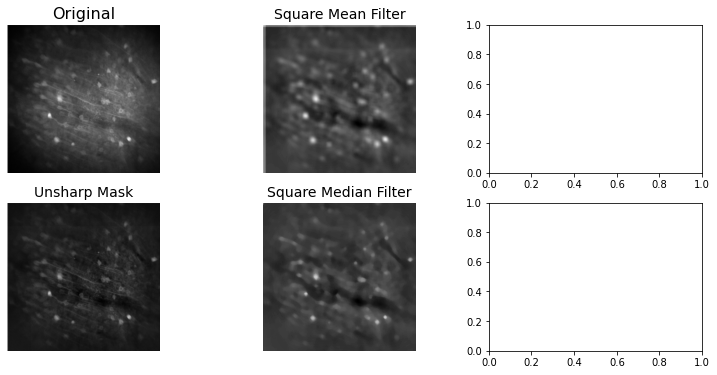

In [66]:
# test spatial filters
from skimage.morphology import square, disk, star
from skimage.filters import rank
from skimage.util import img_as_float, img_as_ubyte

def unsharp_mask(im):  # custom rescaling function 
    im=img_as_ubyte(im)
    selem2=square(100)
    background=1.0*rank.mean(im, selem2)
    im_us=im-background
  
    imin = np.min(im_us)
    imax = np.max(im_us)
    full = imax - imin
    im_us = np.round(255*(im_us - imin)/full, 0)
    return(im_us)

im_us=custom_uint(unsharp_mask(im))

selem=square(10) # make a 10x10 square of ones 
im_mean=unsharp_mask(rank.mean(im_us, selem=selem)) # create image filtered with square mean spatial filter
im_med=unsharp_mask(rank.median(im_us, selem=selem)) # create image filtered with square median spatial filter 


fig, ax=plt.subplots(figsize=(13,6) , ncols=3, nrows=2)


ax[0,0].imshow(im, cmap='gray')
ax[0,0].set_title('Original',fontsize=16)
ax[0,0].axis('off')

ax[1,0].imshow(im_us, cmap='gray')
ax[1,0].set_title('Unsharp Mask', fontsize=14)
ax[1,0].axis('off');

ax[0,1].imshow(im_mean, cmap='gray')
ax[0,1].set_title('Square Mean Filter',fontsize=14)
ax[0,1].axis('off')

ax[1,1].imshow(im_med, cmap='gray')
ax[1,1].set_title('Square Median Filter', fontsize=14)
ax[1,1].axis('off');





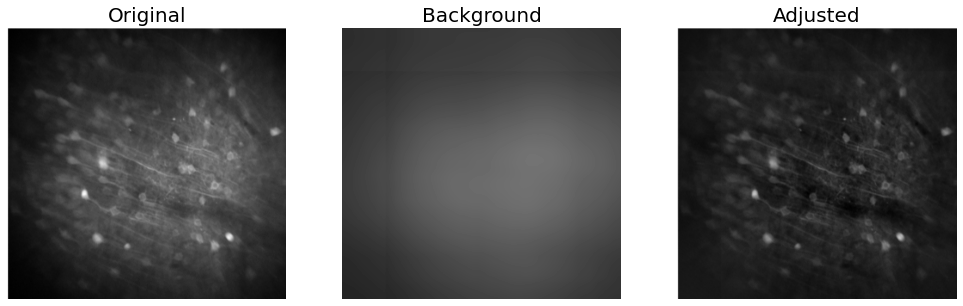